# Forecasting Net Prophet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline

## Finding Unusual Patterns in Hourly Google Search Traffic

___Step 1: Reading the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results.___

In [2]:
df_mercado_trends = pd.read_csv("google.csv", index_col = "Date")

# Converting the index to datetime format
df_mercado_trends.index = pd.to_datetime(df_mercado_trends.index, infer_datetime_format =True)
df_mercado_trends.sort_index(ascending=True, inplace = True)
df_mercado_trends.head()

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


In [3]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [4]:
# Slice the DataFrame to just the month of May 2020
df_may_2020 = df_mercado_trends.loc['2020-05-01':'2020-05-31']
df_may_2020.head()

,Search Trends
Date,
2020-05-01 00:00:00,80
2020-05-01 01:00:00,80
2020-05-01 02:00:00,76
2020-05-01 03:00:00,66
2020-05-01 04:00:00,53


In [5]:
# Use hvPlot to visualize the data for May 2020
df_may_2020.hvplot.line(y=['Search Trends'], title="Trends in May 2020", xlabel="Date")

:Curve   [Date]   (Search Trends)

_A small increase in trends occurs in the and around the $3^{rd}$ and $4^{th}$ of May._

___Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?___

In [6]:
# Calculate the sum of the total search traffic for May 2020
# Use .values[0] to avoid dtype when displaying the sum (Can also use .item())
traffic_may_2020 = df_may_2020.sum().values[0]

# View the traffic_may_2020 value
print(f"The sum of the total search traffic for May 2020 is {traffic_may_2020}")

The sum of the total search traffic for May 2020 is 38181


In [7]:
# Calculate the monthly median search traffic across all months 
# Use .values[0] to avoid dtype when displaying the sum (Can also use .item())
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.groupby(by=[df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median().values[0]

# View the median_monthly_traffic value
print(f"The monthly median traffic across all months is {median_monthly_traffic}")

The monthly median traffic across all months is 35172.5


In [8]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
Percentage_Difference = ((traffic_may_2020 - median_monthly_traffic)/median_monthly_traffic) * 100

# View the percentage difference value
print(f"The percentage difference is {round(Percentage_Difference,2)}%")

The percentage difference is 8.55%


_The google search trend increased by 8.55% when Mercadolab released its financial results._

## Mining the Search Traffic Data for Seasonality

___Step 1: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).___

In [9]:
# Group the hourly search data to plot (use hvPlot) the average traffic by the day of week 
df_mercado_trends.groupby(by=df_mercado_trends.index.day_name()).mean().hvplot.bar(xlabel='Day of the Week', ylabel='Traffic', title = "Average Traffic by Day of the Week")

:Bars   [Date]   (Search Trends)

___Step 2: Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?___

In [10]:
# Use hvPlot to visualize the hour of the day and day of week search traffic as a heatmap.
df_mercado_trends.hvplot.heatmap(
    x='index.hour', y='index.dayofweek', C='Search Trends', cmap='Pastel2',
    title='Hourly Trading Trends by Day of the Week'
).aggregate(function=np.mean)

:HeatMap   [index.hour,index.dayofweek]   (Search Trends)

_Search Traffic is very high at the mid night hours of a given day, especially on the weekdays._

___Step 3: Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?___

In [11]:
# Group the hourly search data to plot (use hvPlot) the average traffic by the week of the year
df_mercado_trends.groupby(by=df_mercado_trends.index.isocalendar().week).mean().hvplot.line(xlabel='Week of Year', ylabel='Traffic', title = "Average Traffic by Week of Year")

:Curve   [week]   (Search Trends)

_The search traffic rather tends to decrease during the winter holiday period._

## Relating the Search Traffic to Stock Price Patterns

___Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.___

In [12]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.

df_mercado_stock = pd.read_csv("mercado_stock_price.csv", index_col = "date")

# Converting the index to datetime format
df_mercado_stock.index = pd.to_datetime(df_mercado_stock.index, infer_datetime_format =True)
df_mercado_stock.sort_index(ascending=True, inplace = True)

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


In [13]:
# Use hvPlot to visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.hvplot.line(y="close", title="Closing Price of Mercado Stock", xlabel="Date", ylabel="Closing Price")

:Curve   [date]   (close)

In [14]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
mercado_stock_trends_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()

# View the first and last five rows of the DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


___Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?___

In [15]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06) 
first_half_2020 = mercado_stock_trends_df["2020-01-01": "2020-06-30"]

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())

,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


In [16]:
# Use hvPlot to visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `hvplot(shared_axes=False, subplots=True).cols(1)`

first_half_2020.hvplot(title = "Trends in the First Half of 2020", shared_axes=False, subplots=True).cols(1)

:NdLayout   [Variable]
   :Curve   [index]   (value)

_The search trends did not observe any comparable or significant changes through the first half in 2020 but the stock closing price consistenly grew over the tenure indicating the increase in the number of customers and therefore revenue._

___Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:___

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

In [17]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado_stock_trends_df["Lagged Search Trends"] = mercado_stock_trends_df["Search Trends"].shift(1)

In [18]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
mercado_stock_trends_df["Stock Volatility"] = mercado_stock_trends_df["close"].pct_change().rolling(window=4).std()

In [19]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate the percentage change of the closing stock price return data by the hour
mercado_stock_trends_df["Hourly Stock Return"] = mercado_stock_trends_df["close"].pct_change()

In [20]:
# View the first and last five rows of the dataframe with new columns
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,0.013566,0.010678


In [21]:
# Use hvPlot to visualize the stock volatility
mercado_stock_trends_df["Stock Volatility"].hvplot()

:Curve   [index]   (Stock Volatility)

_Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours._

__Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?__

In [22]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[["Lagged Search Trends", "Stock Volatility", "Hourly Stock Return"]].corr()

,Lagged Search Trends,Stock Volatility,Hourly Stock Return
Lagged Search Trends,1.000000,-0.148938,0.017929
Stock Volatility,-0.148938,1.000000,0.061424
Hourly Stock Return,0.017929,0.061424,1.000000


_The correlation matrix could not indicate any predictable relationship between the three parameters._

## Create a Time Series Model with Prophet

___Step 1: Set up the Google search data for a Prophet forecasting model.___

In [23]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df.columns = ['ds', 'y']

# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df = mercado_prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(mercado_prophet_df.head())
display(mercado_prophet_df.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [24]:
# Call the Prophet function, store as an object
model_mercado_trends = Prophet()
model_mercado_trends

In [25]:
# Fit the time-series model.
model_mercado_trends.fit(mercado_prophet_df)

14:05:26 - cmdstanpy - INFO - Chain [1] start processing
14:05:41 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [27]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model_mercado_trends.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
39101,2020-11-30 04:00:00,44.975020,31.117536,48.068180,43.844752,45.998629,-5.467547,-5.467547,-5.467547,-4.678127,...,-1.746651,-1.746651,-1.746651,0.957231,0.957231,0.957231,0.0,0.0,0.0,39.507473
39102,2020-11-30 05:00:00,44.974254,16.006895,32.562945,43.843243,45.998421,-20.937968,-20.937968,-20.937968,-20.514584,...,-1.384767,-1.384767,-1.384767,0.961383,0.961383,0.961383,0.0,0.0,0.0,24.036286
39103,2020-11-30 06:00:00,44.973488,3.775107,19.720557,43.841735,45.998213,-32.902922,-32.902922,-32.902922,-32.844677,...,-1.023743,-1.023743,-1.023743,0.965498,0.965498,0.965498,0.0,0.0,0.0,12.070566
39104,2020-11-30 07:00:00,44.972723,-4.154048,13.383620,43.840227,45.998005,-40.174358,-40.174358,-40.174358,-40.478092,...,-0.665842,-0.665842,-0.665842,0.969576,0.969576,0.969576,0.0,0.0,0.0,4.798365
39105,2020-11-30 08:00:00,44.971957,-6.505113,11.024548,43.838718,45.997797,-42.368519,-42.368519,-42.368519,-43.028867,...,-0.313270,-0.313270,-0.313270,0.973617,0.973617,0.973617,0.0,0.0,0.0,2.603438


___Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?___

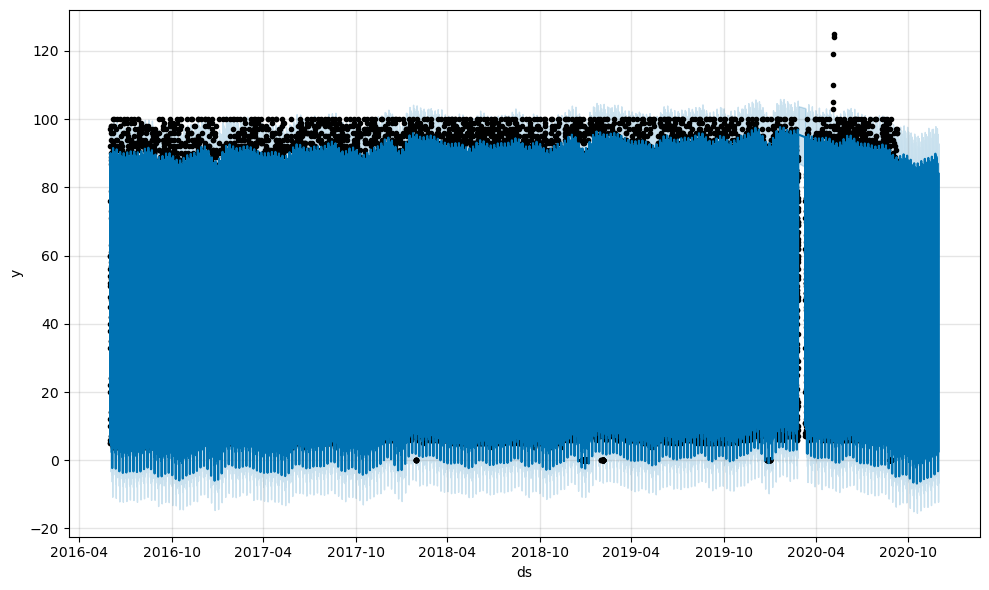

In [28]:
# Plot the Prophet predictions for the Mercado trends data
model_mercado_trends.plot(forecast_mercado_trends);

_The forecast model indicates that the search trend for mercado will decrease in the near term._

___Step 3: Plot the individual time series components of the model to answer the following questions:___

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [29]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.set_index("ds", inplace = True)

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]

,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.659992,80.559023,97.807191
2016-06-01 01:00:00,86.106654,77.384282,95.051864
2016-06-01 02:00:00,75.784037,67.762861,84.486161
2016-06-01 03:00:00,60.517701,52.275128,68.434118
2016-06-01 04:00:00,43.403713,34.728216,51.841416
...,...,...,...
2020-11-30 04:00:00,39.507473,31.117536,48.068180
2020-11-30 05:00:00,24.036286,16.006895,32.562945
2020-11-30 06:00:00,12.070566,3.775107,19.720557


_`yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals)._

In [30]:
# From the forecast_mercado_trends DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours 
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-2000:,:].hvplot(
    title='Search Trends Prediction for the Forecast Period'
)

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

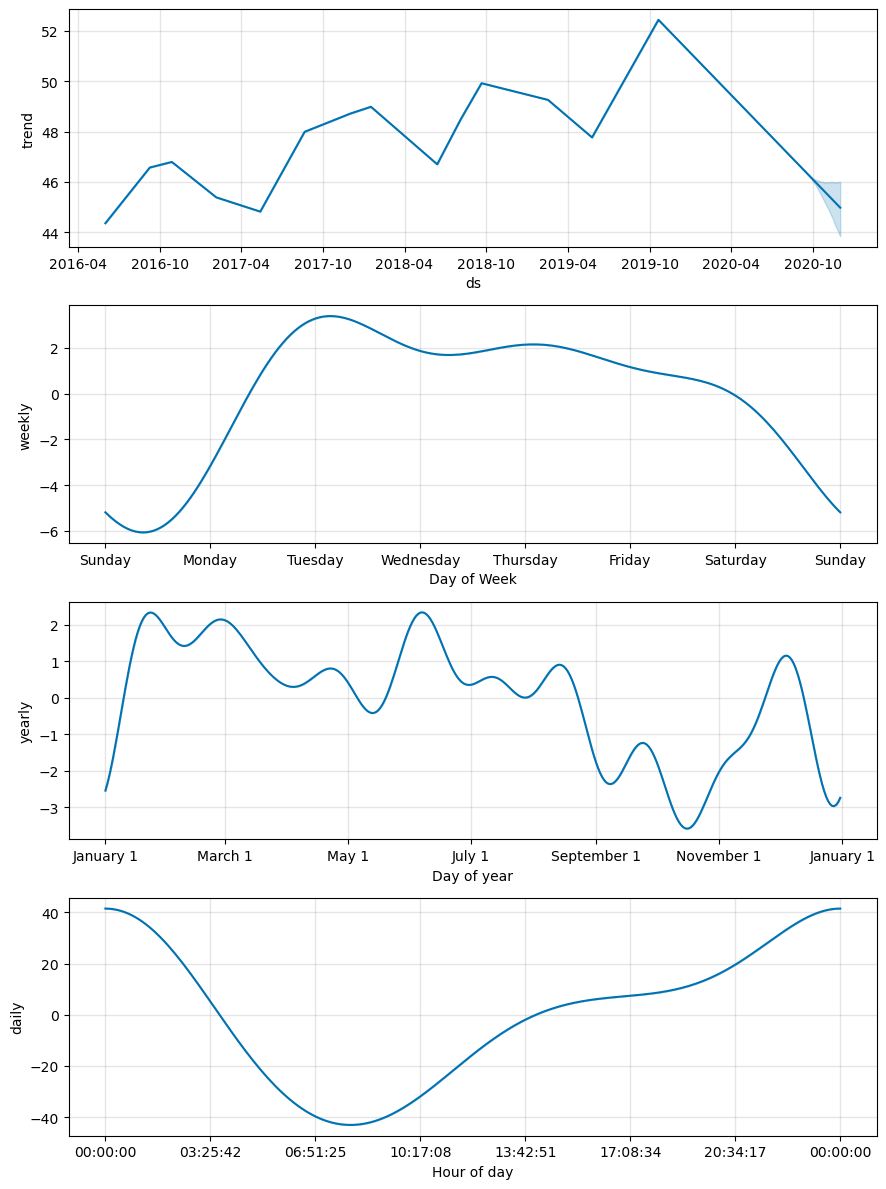

In [31]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends.reset_index(inplace = True)

# Use the plot_components function to visualize the forecast results 
model_mercado_trends.plot_components(forecast_mercado_trends);

* _The midnight hours exhibit the greatest popularity in the trends i.e., 12am_
* _Tuesdays get the most traffic_
* _October indicates the lowest point of search traffic in the calendar year_

## Forecast Revenue by Using Time Series Models

___Step 1: Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data.___

In [32]:
# Upload the "mercado_daily_revenue.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the DatetimeIndex
# Sales are quoted in millions of US dollars

df_mercado_sales = pd.read_csv("mercado_daily_revenue.csv", index_col = "date")

# Converting the index to datetime format
df_mercado_sales.index = pd.to_datetime(df_mercado_sales.index, infer_datetime_format =True)
df_mercado_sales.sort_index(ascending=True, inplace = True)

# View the first and last five rows of the DataFrame
display(df_mercado_sales.head())
display(df_mercado_sales.tail())

,Daily Sales
date,
2019-01-01,0.626452
2019-01-02,1.301069
2019-01-03,1.751689
2019-01-04,3.256294
2019-01-05,3.732920


,Daily Sales
date,
2020-05-10,17.467814
2020-05-11,17.537152
2020-05-12,18.031773
2020-05-13,19.165315
2020-05-14,20.246570


In [33]:
# Use hvPlot to visualize the daily sales figures 
df_mercado_sales.hvplot.line(y="Daily Sales", title="Daily Sales Figures", xlabel="Date", ylabel="Sales")

:Curve   [date]   (Daily Sales)

In [34]:
# Apply a Facebook Prophet model to the data.

# Set up the dataframe in the neccessary format:
# Reset the index so that date becomes a column in the DataFrame
mercado_sales_prophet_df = df_mercado_sales.reset_index()

# Adjust the columns names to the Prophet syntax
mercado_sales_prophet_df.columns = ['ds', 'y']

# Visualize the DataFrame
mercado_sales_prophet_df.head()

,ds,y
0,2019-01-01,0.626452
1,2019-01-02,1.301069
2,2019-01-03,1.751689
3,2019-01-04,3.256294
4,2019-01-05,3.732920


In [35]:
# Create the model
mercado_sales_prophet_model = Prophet()

# Fit the model
mercado_sales_prophet_model.fit(mercado_sales_prophet_df)

14:05:59 - cmdstanpy - INFO - Chain [1] start processing
14:05:59 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
# Predict sales for 90 days (1 quarter) out into the future.

# Start by making a future dataframe
mercado_sales_prophet_future = mercado_sales_prophet_model.make_future_dataframe(periods=90, freq='D')

# Display the last five rows of the future DataFrame
mercado_sales_prophet_future.tail()

,ds
585,2020-08-08
586,2020-08-09
587,2020-08-10
588,2020-08-11
589,2020-08-12


In [37]:
# Make predictions for the sales each day over the next quarter
mercado_sales_prophet_forecast = mercado_sales_prophet_model.predict(mercado_sales_prophet_future)

# Display the last 5 rows of the resulting DataFrame
mercado_sales_prophet_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
585,2020-08-08,23.220981,21.280329,24.976350,23.218091,23.223839,-0.124093,-0.124093,-0.124093,-0.124093,-0.124093,-0.124093,0.0,0.0,0.0,23.096888
586,2020-08-09,23.260590,21.288303,25.126704,23.257664,23.263493,-0.034189,-0.034189,-0.034189,-0.034189,-0.034189,-0.034189,0.0,0.0,0.0,23.226402
587,2020-08-10,23.300200,21.324595,25.238061,23.297220,23.303189,0.050083,0.050083,0.050083,0.050083,0.050083,0.050083,0.0,0.0,0.0,23.350283
588,2020-08-11,23.339809,21.546506,25.435800,23.336773,23.342881,0.063795,0.063795,0.063795,0.063795,0.063795,0.063795,0.0,0.0,0.0,23.403604
589,2020-08-12,23.379419,21.550701,25.363634,23.376326,23.382552,0.082856,0.082856,0.082856,0.082856,0.082856,0.082856,0.0,0.0,0.0,23.462275


___Step 2: Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)___

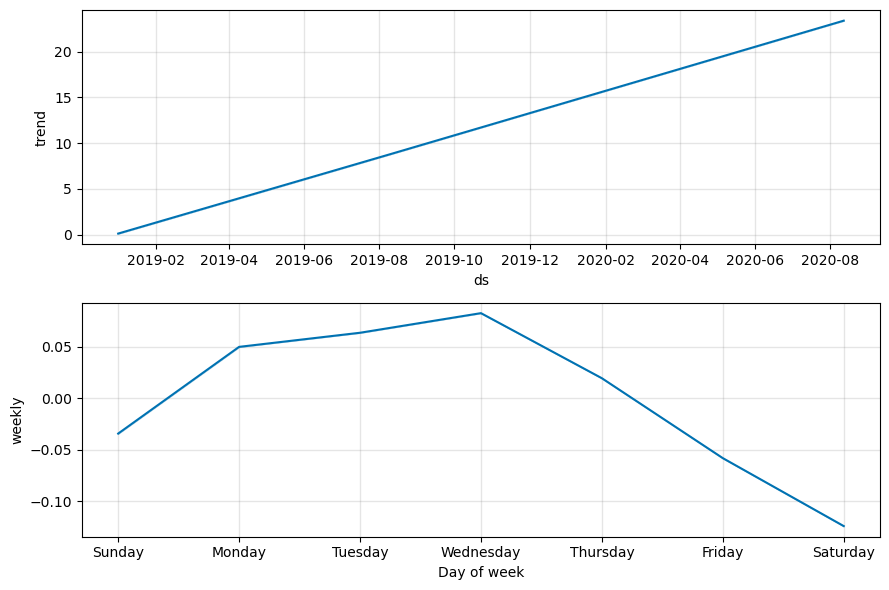

In [38]:
# Use the plot_components function to analyze seasonal patterns in the company's revenue
mercado_sales_prophet_model.plot_components(mercado_sales_prophet_forecast);

_Wednesdays have the highest revenue_

___Step 3: Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.___

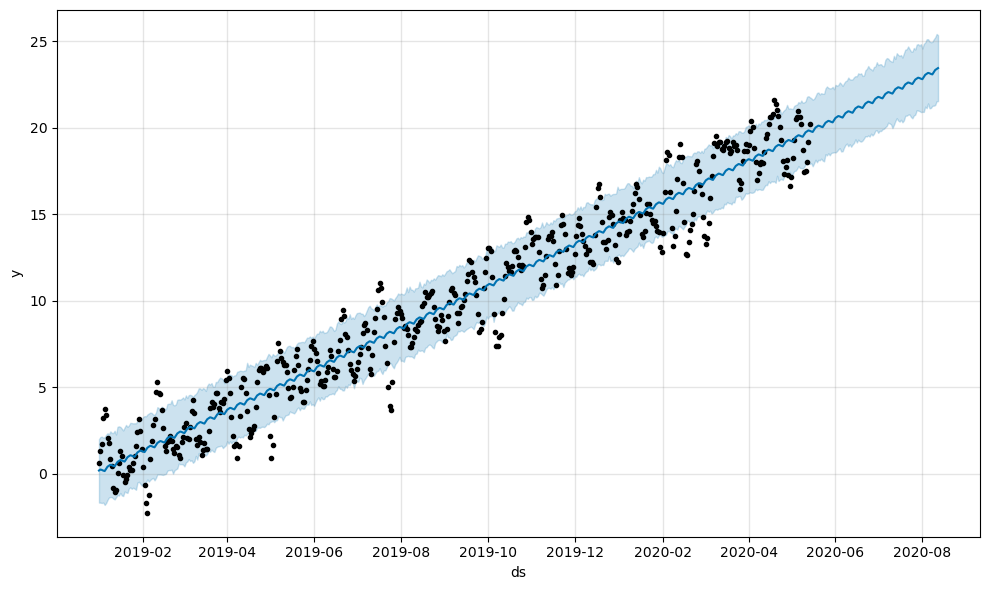

In [39]:
# Plot the predictions for the Mercado sales
mercado_sales_prophet_model.plot(mercado_sales_prophet_forecast);

In [40]:
# For the mercado_sales_prophet_forecast DataFrame, set the ds column as the DataFrame Index
mercado_sales_prophet_forecast = mercado_sales_prophet_forecast.set_index('ds')

# Display the first and last five rows of the DataFrame
display(mercado_sales_prophet_forecast.head())
display(mercado_sales_prophet_forecast.tail())

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2019-01-01,0.131299,-1.659253,2.009378,0.131299,0.131299,0.063795,0.063795,0.063795,0.063795,0.063795,0.063795,0.0,0.0,0.0,0.195094
2019-01-02,0.170495,-1.664200,2.132721,0.170495,0.170495,0.082856,0.082856,0.082856,0.082856,0.082856,0.082856,0.0,0.0,0.0,0.253351
2019-01-03,0.209691,-1.682248,2.153390,0.209691,0.209691,0.019603,0.019603,0.019603,0.019603,0.019603,0.019603,0.0,0.0,0.0,0.229294
2019-01-04,0.248887,-1.659290,2.090901,0.248887,0.248887,-0.058057,-0.058057,-0.058057,-0.058057,-0.058057,-0.058057,0.0,0.0,0.0,0.190830
2019-01-05,0.288083,-1.794724,2.124670,0.288083,0.288083,-0.124093,-0.124093,-0.124093,-0.124093,-0.124093,-0.124093,0.0,0.0,0.0,0.163991


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2020-08-08,23.220981,21.280329,24.976350,23.218091,23.223839,-0.124093,-0.124093,-0.124093,-0.124093,-0.124093,-0.124093,0.0,0.0,0.0,23.096888
2020-08-09,23.260590,21.288303,25.126704,23.257664,23.263493,-0.034189,-0.034189,-0.034189,-0.034189,-0.034189,-0.034189,0.0,0.0,0.0,23.226402
2020-08-10,23.300200,21.324595,25.238061,23.297220,23.303189,0.050083,0.050083,0.050083,0.050083,0.050083,0.050083,0.0,0.0,0.0,23.350283
2020-08-11,23.339809,21.546506,25.435800,23.336773,23.342881,0.063795,0.063795,0.063795,0.063795,0.063795,0.063795,0.0,0.0,0.0,23.403604
2020-08-12,23.379419,21.550701,25.363634,23.376326,23.382552,0.082856,0.082856,0.082856,0.082856,0.082856,0.082856,0.0,0.0,0.0,23.462275


In [41]:
# Produce a sales forecast for the finance division
# giving them a number for expected total sales next quarter.
# Provide best case (yhat_upper), worst case (yhat_lower), and most likely (yhat) scenarios.

# Create a forecast_quarter Dataframe for the period 2020-07-01 to 2020-09-30
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
mercado_sales_forecast_quarter = mercado_sales_prophet_forecast[["yhat_upper", "yhat_lower", "yhat"]].loc["2020-07-01": "2020-09-30"]

# Update the column names for the forecast_quarter DataFrame
# to match what the finance division is looking for 
mercado_sales_forecast_quarter.columns = ["Best Case", "Worst Case", "Most Likely"]

# Review the last five rows of the DataFrame
mercado_sales_forecast_quarter.tail()

,Best Case,Worst Case,Most Likely
ds,,,
2020-08-08,24.976350,21.280329,23.096888
2020-08-09,25.126704,21.288303,23.226402
2020-08-10,25.238061,21.324595,23.350283
2020-08-11,25.435800,21.546506,23.403604
2020-08-12,25.363634,21.550701,23.462275


In [42]:
# Display the summed values for all the rows in the forecast_quarter DataFrame
mercado_sales_forecast_quarter.sum()

Best Case      1051.574151
Worst Case      887.840738
Most Likely     969.630481
dtype: float64

___Based on the forecast information generated above, produce a sales forecast for the finance division, giving them a number for expected total sales next quarter. Include best and worst case scenarios, to better help the finance team plan.___

We can predict next quarter's total sales with 95% certainty as follows:
* __Best case:__ $1.051 billion

* __Worst case:__ $888.23 million

* __Most likely:__ $969.63 million